### 1. Create feature

In [43]:
from PIL import Image
from tqdm import tqdm
import os
path = 'C:/Users/lukma/Desktop/DS/Povetry/valid/fake/'
path_new = 'C:/Users/lukma/Desktop/DS/Povetry/valid/fake_jpg/'
for file in tqdm(os.listdir(path)):
    im = Image.open(path + file)
    rgb_im = im.convert('RGB')
    rgb_im.save(path_new + file.rstrip('.png') + '.jpg')

   


100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 146.98it/s]


In [2]:
import cv2
import numpy as np
import os
import radialProfile
import glob
from matplotlib import pyplot as plt
import pickle
from tqdm import tqdm

In [2]:
path = ['C:/Users/lukma/Desktop/DS/Povetry/train/real_jpg/', 'C:/Users/lukma/Desktop/DS/BST/train/real/', 
        'C:/Users/lukma/Desktop/DS/Povetry/train/fake_jpg/', 'C:/Users/lukma/Desktop/DS/BST/train/fake/']
labels = [1, 1, 0, 0]
format_file = ['jpg','jpg','jpg','jpg']
epsilon = 1e-8
data_train = {}
#number of samples from each dataset
stop = 3000
number_iter = 4 * stop
psd1D_total = np.zeros([number_iter, 179])
label_total = np.zeros([number_iter])
iter_ = 0

for z in range(4):
    cont = 0
    psd1D_average_org = np.zeros(360)
    print(path[z])
    
    for filename in glob.glob(path[z]+"/*."+format_file[z]):  
        img = cv2.imread(filename,0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon

        magnitude_spectrum = 20*np.log(np.abs(fshift))

        # Calculate the azimuthally averaged 1D power spectrum
        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
        psd1D_total[iter_,:] = psd1D
        label_total[iter_] = labels[z]

        cont+=1
        iter_+=1
        if cont >= stop:
            break

data_train["data"] = psd1D_total
data_train["label"] = label_total

output = open('dataset_train_sum.pkl', 'wb')
pickle.dump(data_train, output)
output.close()
print("DATA Saved")    

  0%|                                                                                 | 4/3000 [00:00<01:19, 37.84it/s]

C:/Users/lukma/Desktop/DS/Povetry/train/real_jpg/


  0%|▏                                                                                | 5/3024 [00:00<01:04, 46.85it/s]

C:/Users/lukma/Desktop/DS/BST/train/real/


  0%|▏                                                                                | 5/3000 [00:00<01:26, 34.57it/s]

C:/Users/lukma/Desktop/DS/Povetry/train/fake_jpg/


  0%|                                                                                 | 4/3024 [00:00<01:16, 39.32it/s]

C:/Users/lukma/Desktop/DS/BST/train/fake/


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2999/3024 [01:06<00:00, 44.80it/s]

DATA Saved


In [3]:
path = ['C:/Users/lukma/Desktop/DS/Povetry/valid/real_jpg/', 'C:/Users/lukma/Desktop/DS/BST/valid/real/', 
        'C:/Users/lukma/Desktop/DS/Povetry/valid/fake_jpg/', 'C:/Users/lukma/Desktop/DS/BST/valid/fake/']
labels = [1, 1, 0, 0]
format_file = ['jpg','jpg','jpg','jpg']
epsilon = 1e-8
data_valid = {}
#number of samples from each dataset
stop = 500
number_iter = 4 * stop
psd1D_total = np.zeros([number_iter, 179])
label_total = np.zeros([number_iter])
iter_ = 0

for z in range(4):
    cont = 0
    psd1D_average_org = np.zeros(360)
    print(path[z])
    
    for filename in glob.glob(path[z]+"/*."+format_file[z]):  
        img = cv2.imread(filename,0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon

        magnitude_spectrum = 20*np.log(np.abs(fshift))

        # Calculate the azimuthally averaged 1D power spectrum
        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
        psd1D_total[iter_,:] = psd1D
        label_total[iter_] = labels[z]

        cont+=1
        iter_+=1
        if cont >= stop:
            break

data_valid["data"] = psd1D_total
data_valid["label"] = label_total

output = open('dataset_valid_sum.pkl', 'wb')
pickle.dump(data_valid, output)
output.close()
print("DATA Saved")

  1%|▊                                                                                 | 5/500 [00:00<00:10, 47.30it/s]

C:/Users/lukma/Desktop/DS/Povetry/valid/real_jpg/


  1%|▊                                                                                 | 5/504 [00:00<00:10, 48.67it/s]

C:/Users/lukma/Desktop/DS/BST/valid/real/


  1%|▉                                                                                 | 6/500 [00:00<00:08, 56.23it/s]

C:/Users/lukma/Desktop/DS/Povetry/valid/fake_jpg/


  1%|▊                                                                                 | 5/504 [00:00<00:11, 43.98it/s]

C:/Users/lukma/Desktop/DS/BST/valid/fake/


 99%|███████████████████████████████████████████████████████████████████████████████▏| 499/504 [00:10<00:00, 46.25it/s]

DATA Saved


### 2. Loading Features

Now, we load the features. Either the pre-computed ones or the features that you have created.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# load feature file
pkl_file_train = open('dataset_train_sum.pkl', 'rb')
data_train = pickle.load(pkl_file_train)
pkl_file_train.close()
X_train = data_train["data"]
y_train = data_train["label"]

We look at the label distribution, to be sure that we have a balanced dataset.

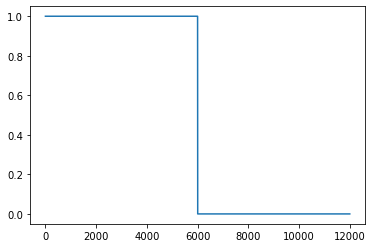

In [5]:
plt.plot(y_train)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# load feature file
pkl_file_valid = open('dataset_valid_sum.pkl', 'rb')
data_valid = pickle.load(pkl_file_valid)
pkl_file_valid.close()
X_valid = data_valid["data"]
y_valid = data_valid["label"]

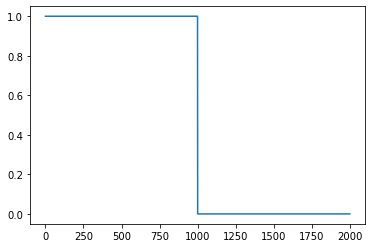

In [7]:
plt.plot(y_valid)

### 3. Check Spectrum

We have a look to the spectrum

6000 6000


Text(0, 0.5, 'Power Spectrum')

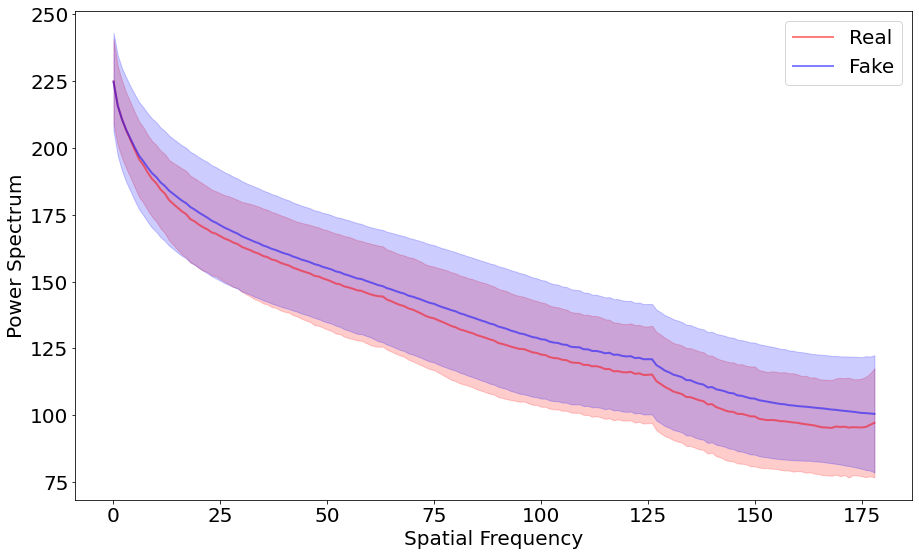

In [8]:
num = int(X_train.shape[0]/2)
num_feat = X_train.shape[1]

psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

# We separate real and fake using the label
for x in range(X_train.shape[0]):   
    if y_train[x]==0:
        psd1D_org_0[cont_0,:] = X_train[x,:]
        cont_0+=1
    elif y_train[x]==1:
        psd1D_org_1[cont_1,:] = X_train[x,:]
        cont_1+=1

print (cont_0, cont_1)        

# We compute statistcis
for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])
    
# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Real', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Fake', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)
ax.legend()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)

1000 1000


Text(0, 0.5, 'Power Spectrum')

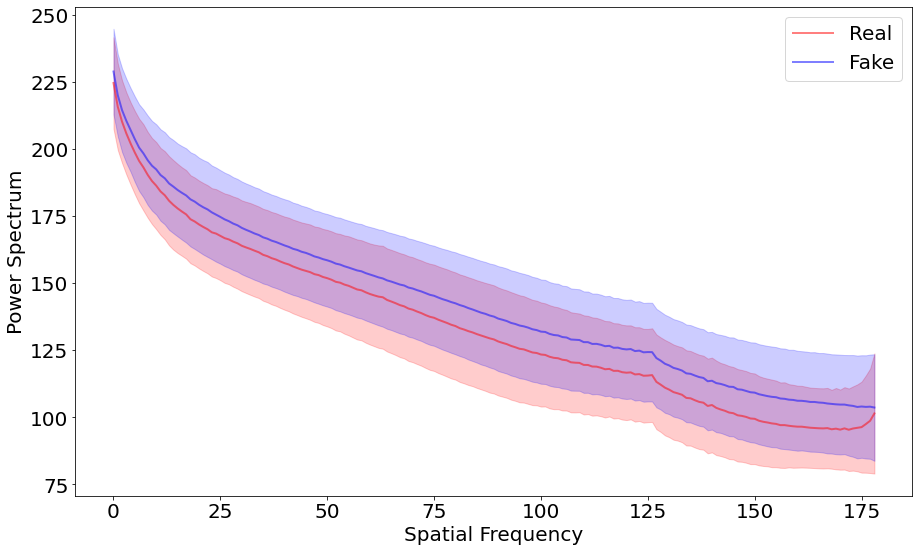

In [9]:
num = int(X_valid.shape[0]/2)
num_feat = X_valid.shape[1]

psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

# We separate real and fake using the label
for x in range(X_valid.shape[0]):   
    if y_valid[x]==0:
        psd1D_org_0[cont_0,:] = X_valid[x,:]
        cont_0+=1
    elif y_valid[x]==1:
        psd1D_org_1[cont_1,:] = X_valid[x,:]
        cont_1+=1

print (cont_0, cont_1)        

# We compute statistcis
for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])
    
# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Real', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Fake', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)
ax.legend()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)

### 4. Classification

Now we classify using the features.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

num = 100
LR = 0
SVM = 0
KNC = 0


for z in tqdm(range(num)):
    # read python dict back from the file
    pkl_file_train = open('dataset_train_sum.pkl', 'rb')
    
    data_train = pickle.load(pkl_file_train)
    pkl_file_train.close()
    
    X_train = data_train["data"]
    y_train = data_train["label"]
    
    pkl_file_valid = open('dataset_valid_sum.pkl', 'rb')
    
    data_valid = pickle.load(pkl_file_valid)
    pkl_file_valid.close()
    
    X_valid = data_valid["data"]
    y_valid = data_valid["label"]
    
    try:

        #from sklearn.model_selection import train_test_split
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        

        from sklearn.svm import SVC
        svclassifier = SVC(kernel='poly')
        svclassifier.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(svclassifier.score(X_test, y_test)))
        
        from sklearn.linear_model import LogisticRegression
        logreg = LogisticRegression(solver='liblinear', max_iter=500)
        logreg.fit(X_train, y_train)
        #print('Accuracy on test set: {:.3f}'.format(logreg.score(X_test, y_test)))
        
        from sklearn.neighbors import KNeighborsClassifier
        knc = KNeighborsClassifier(n_neighbors = 5)
        knc.fit(X_train, y_train)

        
        SVM+=svclassifier.score(X_valid, y_valid)
        LR+=logreg.score(X_valid, y_valid)
        KNC+=knc.score(X_valid, y_valid)

 
    except:
        num-=1
        print(num)
        
print("Average SVM: "+str(SVM/num))
print("Average LR: "+str(LR/num))
print("Average KNC: "+str(KNC/num))

 42%|█████████████████████████████████▏                                             | 42/100 [41:35<1:10:17, 72.72s/it]

99


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [1:50:30<00:00, 66.30s/it]

Average SVM: 0.7772727272727268
Average LR: 0.7707070707070711
Average KNC: 0.7854999999999993


In [12]:
filename_svm = 'model_svm_sum_100.sav'
pickle.dump(svclassifier, open(filename_svm, 'wb'))

In [13]:
filename_lr = 'model_lr_sum_100.sav'
pickle.dump(logreg, open(filename_lr, 'wb'))

In [14]:
filename_knc = 'model_knc_sum_100.sav'
pickle.dump(knc, open(filename_knc, 'wb'))

### Метрики качества

In [15]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### SVM

In [17]:
y_pred_svm = svclassifier.predict(X_valid)

score = metrics.precision_score(y_valid,y_pred_svm, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_valid,y_pred_svm, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_valid,y_pred_svm, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.774654999689166
Recall score: 0.7695
F1 score: 0.7684133374828037


Confusion matrix, without normalization
[[701 299]
 [162 838]]


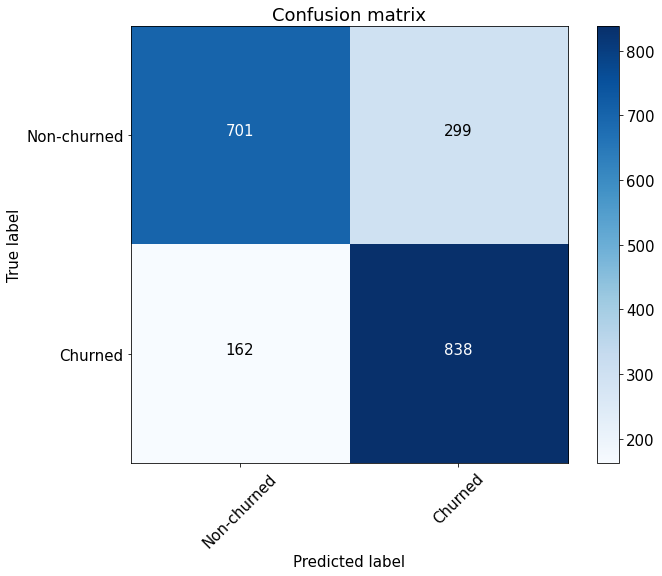

In [18]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_svm = confusion_matrix(y_valid, svclassifier.predict(X_valid))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_svm, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_valid,y_pred_svm))

ROC_AUC score: 0.7695000000000001


### Logistic Regression

In [20]:
y_pred_lr = logreg.predict(X_valid)

score = metrics.precision_score(y_valid,y_pred_lr, average= "weighted")
print("SNM /nPrecision score: {}".format(score))
score = metrics.recall_score(y_valid,y_pred_lr, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_valid,y_pred_lr, average= "weighted")
print("F1 score: {}".format(score_lr1))

SNM /nPrecision score: 0.7631052420968387
Recall score: 0.763
F1 score: 0.7629762976297629


Confusion matrix, without normalization
[[753 247]
 [227 773]]


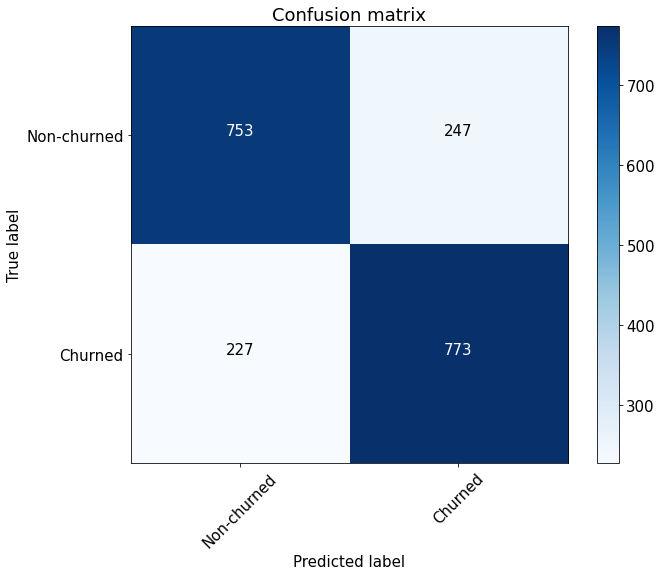

In [21]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_lr = confusion_matrix(y_valid, logreg.predict(X_valid))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_lr, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_valid,y_pred_lr))

ROC_AUC score: 0.763


### K Neighbours

In [22]:
#kn_loaded = pickle.load(open('model_knc_BST.sav', 'rb'))

In [23]:
y_pred_knc = knc.predict(X_valid)

score = metrics.precision_score(y_valid,y_pred_knc, average= "weighted")
print("SNM /nPrecision score: {}".format(score))
score = metrics.recall_score(y_valid,y_pred_knc, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_valid,y_pred_knc, average= "weighted")
print("F1 score: {}".format(score_lr1))

SNM /nPrecision score: 0.7901803183547436
Recall score: 0.7855
F1 score: 0.7846315806912423


Confusion matrix, without normalization
[[722 278]
 [151 849]]


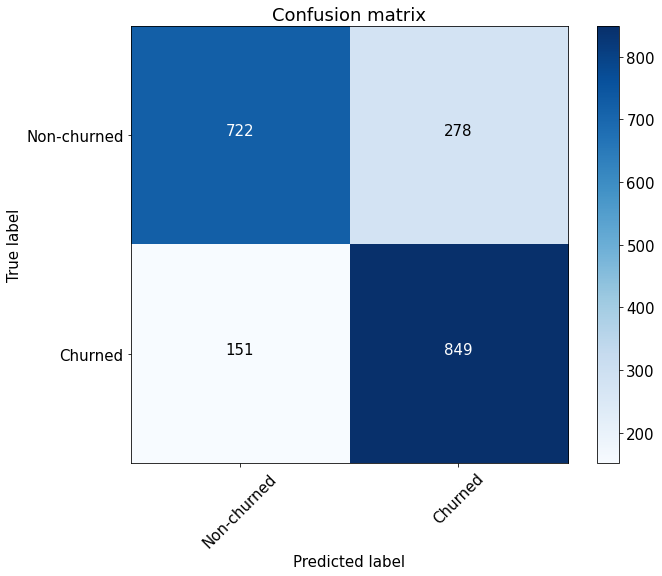

In [24]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_knc = confusion_matrix(y_valid, knc.predict(X_valid))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_knc, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [53]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_valid,y_pred_knc))

ROC_AUC score: 0.7855


### Проверяем на тестовом наборе данных

In [25]:
loaded_model_kn = pickle.load(open('model_knc_sum_100.sav', 'rb'))

In [26]:
loaded_model_svm = pickle.load(open('model_svm_sum_100.sav', 'rb'))
loaded_model_lr = pickle.load(open('model_lr_sum_100.sav', 'rb'))

In [27]:
import cv2
import numpy as np
import os
import radialProfile
import glob
from matplotlib import pyplot as plt
import pickle
from tqdm import tqdm

In [29]:
path = ['C:/Users/lukma/Desktop/DS/Povetry/test/real_jpg/', 'C:/Users/lukma/Desktop/DS/BST/test/real/', 
        'C:/Users/lukma/Desktop/DS/Povetry/test/fake_jpg/', 'C:/Users/lukma/Desktop/DS/BST/test/fake/']
labels = [1,1,0,0]
format_file = ['jpg','jpg','jpg','jpg']
epsilon = 1e-8
data_test = {}
#number of samples from each dataset
stop = 500
number_iter = 4 * stop
psd1D_total = np.zeros([number_iter, 179])
label_total = np.zeros([number_iter])
iter_ = 0

for z in range(4):
    cont = 0
    psd1D_average_org = np.zeros(179)
    print(path[z])
    
    for filename in tqdm(glob.glob(path[z]+"/*."+format_file[z])):  
        img = cv2.imread(filename,0)
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        fshift += epsilon

        magnitude_spectrum = 20*np.log(np.abs(fshift))

        # Calculate the azimuthally averaged 1D power spectrum
        psd1D = radialProfile.azimuthalAverage(magnitude_spectrum)
        psd1D_total[iter_,:] = psd1D
        label_total[iter_] = labels[z]

        cont+=1
        iter_+=1
        if cont >= stop:
            break

data_test["data"] = psd1D_total
data_test["label"] = label_total

output = open('dataset_test_sum.pkl', 'wb')
pickle.dump(data_test, output)
output.close()
print("DATA Saved")

  1%|▉                                                                                 | 6/500 [00:00<00:09, 51.42it/s]

C:/Users/lukma/Desktop/DS/Povetry/test/real_jpg/


  1%|▉                                                                                 | 6/504 [00:00<00:09, 55.19it/s]

C:/Users/lukma/Desktop/DS/BST/test/real/


  1%|▉                                                                                 | 6/500 [00:00<00:09, 52.77it/s]

C:/Users/lukma/Desktop/DS/Povetry/test/fake_jpg/


  1%|▊                                                                                 | 5/504 [00:00<00:11, 44.76it/s]

C:/Users/lukma/Desktop/DS/BST/test/fake/


 99%|███████████████████████████████████████████████████████████████████████████████▏| 499/504 [00:10<00:00, 46.50it/s]

DATA Saved


In [55]:
pkl_file_test = open('dataset_test_sum.pkl', 'rb')
data_test = pickle.load(pkl_file_test)
pkl_file_test.close()
X_test = data_test["data"]
y_test = data_test["label"]

In [56]:
print(len(X_test))
print(len(y_test))

2000
2000


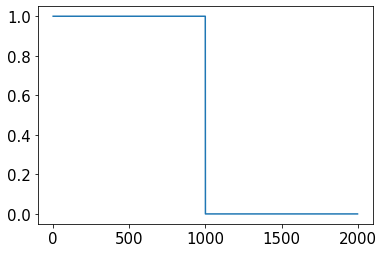

In [57]:
plt.plot(y_test)

1000 1000


Text(0, 0.5, 'Power Spectrum')

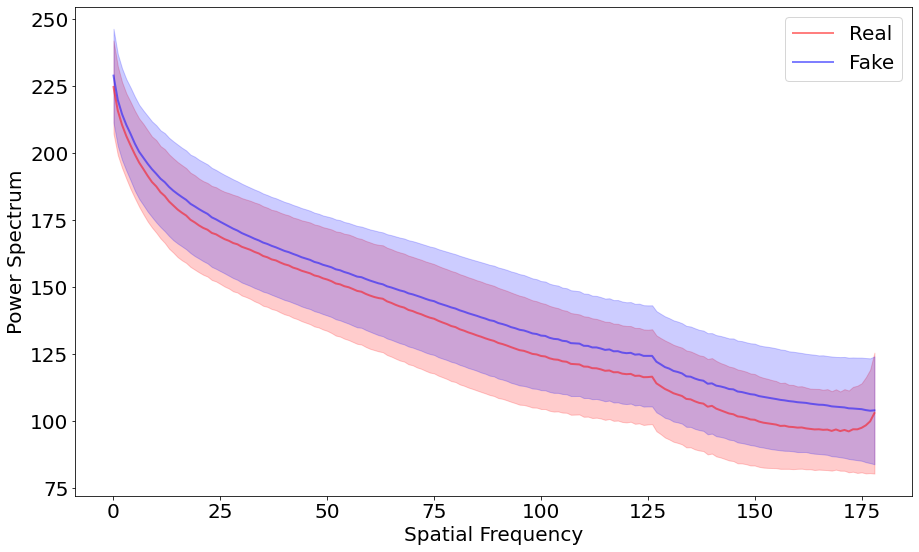

In [58]:
num = int(X_test.shape[0]/2)
num_feat = X_test.shape[1]

psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)

cont_0=0
cont_1=0

# We separate real and fake using the label
for x in range(X_test.shape[0]):   
    if y_test[x]==0:
        psd1D_org_0[cont_0,:] = X_test[x,:]
        cont_0+=1
    elif y_test[x]==1:
        psd1D_org_1[cont_1,:] = X_test[x,:]
        cont_1+=1

print (cont_0, cont_1)        

# We compute statistcis
for x in range(num_feat):
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])
    
# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='Real', linewidth =2.0)
ax.fill_between(x, psd1D_org_0_mean - psd1D_org_0_std, psd1D_org_0_mean + psd1D_org_0_std, color='red', alpha=0.2)
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='Fake', linewidth =2.0)
ax.fill_between(x, psd1D_org_1_mean - psd1D_org_1_std, psd1D_org_1_mean + psd1D_org_1_std, color='blue', alpha=0.2)
ax.legend()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)

In [59]:
result_svm = loaded_model_svm.score(X_test, y_test)
result_lr = loaded_model_lr.score(X_test, y_test)
result_kn = loaded_model_kn.score(X_test, y_test)

print(result_svm)
print(result_lr)
print(result_kn)

0.766
0.769
0.7965


In [60]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### SVM

In [62]:
y1_pred_svm = loaded_model_svm.predict(X_test)

score = metrics.precision_score(y_test,y1_pred_svm, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test,y1_pred_svm, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test,y1_pred_svm, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.7726348415028124
Recall score: 0.766
F1 score: 0.7645676294576201


Confusion matrix, without normalization
[[688 312]
 [156 844]]


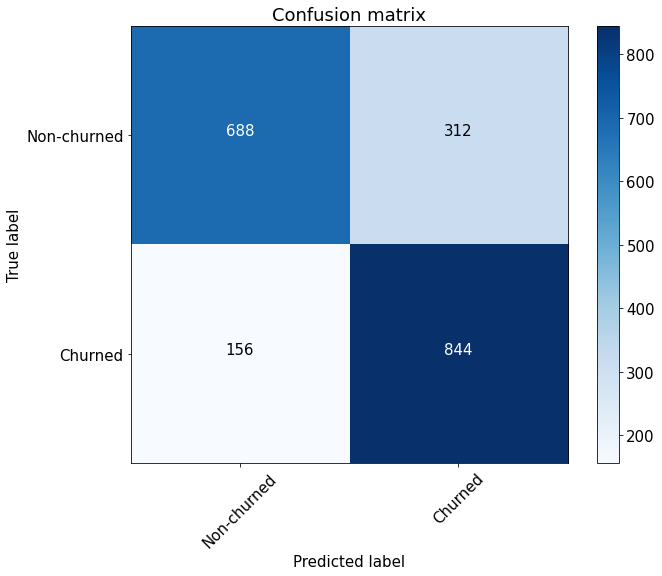

In [63]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_svm1 = confusion_matrix(y_test, loaded_model_svm.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_svm1, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [64]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test,y1_pred_svm))

ROC_AUC score: 0.7659999999999999


### Logistic regression

In [65]:
y1_pred_lr = loaded_model_lr.predict(X_test)

score = metrics.precision_score(y_test,y1_pred_lr, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test,y1_pred_lr, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test,y1_pred_lr, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.7703245904934177
Recall score: 0.769
F1 score: 0.768716677930465


Confusion matrix, without normalization
[[734 266]
 [196 804]]


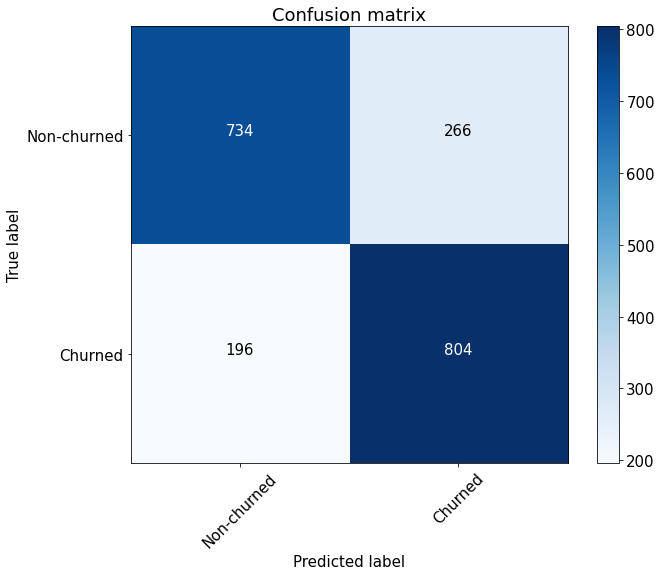

In [66]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_lr1 = confusion_matrix(y_test, loaded_model_lr.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_lr1, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [67]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test,y1_pred_lr))

ROC_AUC score: 0.769


### K Neighbours

In [68]:
y1_pred_kn = loaded_model_kn.predict(X_test)

score = metrics.precision_score(y_test,y1_pred_kn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test,y1_pred_kn, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test,y1_pred_kn, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.8012063492063491
Recall score: 0.7965
F1 score: 0.7957019607843137


Confusion matrix, without normalization
[[734 266]
 [141 859]]


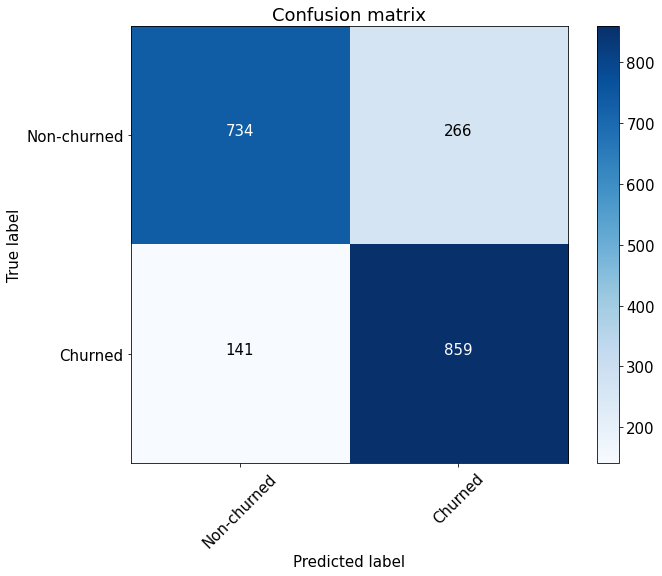

In [69]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_kn1 = confusion_matrix(y_test, loaded_model_kn.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_kn1, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [70]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test,y1_pred_kn))

ROC_AUC score: 0.7965


### Проверка на тестовом наборе BST

In [3]:
loaded_model_svm = pickle.load(open('model_svm_sum_100.sav', 'rb'))
loaded_model_lr = pickle.load(open('model_lr_sum_100.sav', 'rb'))
loaded_model_kn = pickle.load(open('model_knc_sum_100.sav', 'rb'))

In [4]:
pkl_file_test_bst = open('dataset_test_BST.pkl', 'rb')
data_test_bst = pickle.load(pkl_file_test_bst)
pkl_file_test_bst.close()
X_test_bst = data_test_bst["data"]
y_test_bst = data_test_bst["label"]

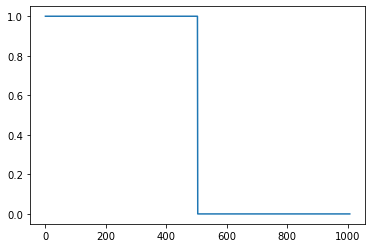

In [5]:
plt.plot(y_test_bst)

In [6]:
result_svm_bst = loaded_model_svm.score(X_test_bst, y_test_bst)
result_lr_bst = loaded_model_lr.score(X_test_bst, y_test_bst)
result_kn_bst = loaded_model_kn.score(X_test_bst, y_test_bst)

print(result_svm_bst)
print(result_lr_bst)
print(result_kn_bst)

0.7559523809523809
0.8214285714285714
0.7996031746031746


### Метрики качества

In [7]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### SVM

In [9]:
y_pred_svm_bst = loaded_model_svm.predict(X_test_bst)

score = metrics.precision_score(y_test_bst,y_pred_svm_bst, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test_bst,y_pred_svm_bst, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test_bst,y_pred_svm_bst, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.7924275407948473
Recall score: 0.7559523809523809
F1 score: 0.7480972795058819


Confusion matrix, without normalization
[[292 212]
 [ 34 470]]


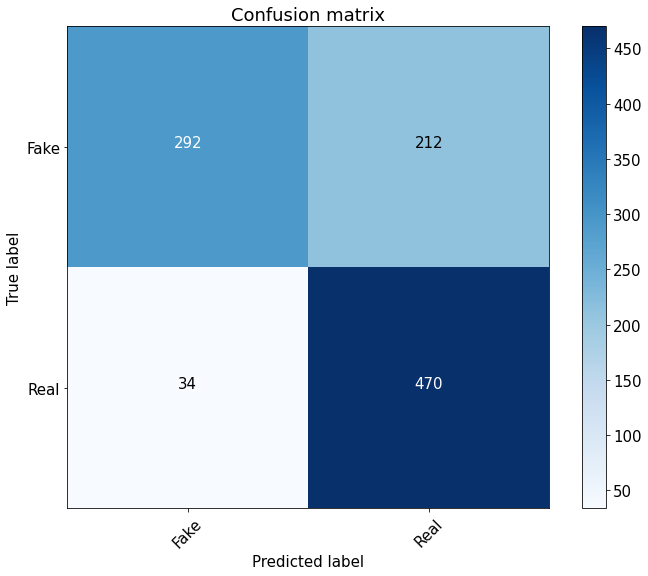

In [10]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_svm_bst = confusion_matrix(y_test_bst, loaded_model_svm.predict(X_test_bst))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_svm_bst, classes=['Fake', 'Real'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [11]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test_bst,y_pred_svm_bst))

ROC_AUC score: 0.7559523809523809


### Logistic Regression

In [12]:
y_pred_lr_bst = loaded_model_lr.predict(X_test_bst)

score = metrics.precision_score(y_test_bst,y_pred_lr_bst, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test_bst,y_pred_lr_bst, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test_bst,y_pred_lr_bst, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.8340588841791727
Recall score: 0.8214285714285714
F1 score: 0.8197245792182501


Confusion matrix, without normalization
[[365 139]
 [ 41 463]]


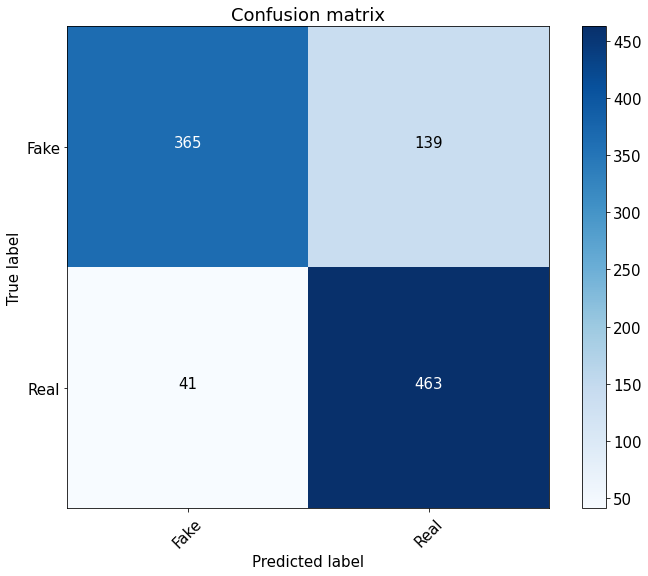

In [19]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_lr_bst = confusion_matrix(y_test_bst, loaded_model_lr.predict(X_test_bst))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_lr_bst, classes=['Fake', 'Real'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [14]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test_bst,y_pred_lr_bst))

ROC_AUC score: 0.8214285714285714


### K Neighbors

In [15]:
y_pred_kn_bst = loaded_model_kn.predict(X_test_bst)

score = metrics.precision_score(y_test_bst,y_pred_kn_bst, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test_bst,y_pred_kn_bst, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test_bst,y_pred_kn_bst, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.817608173076923
Recall score: 0.7996031746031746
F1 score: 0.7967222541690626


Confusion matrix, without normalization
[[343 161]
 [ 41 463]]


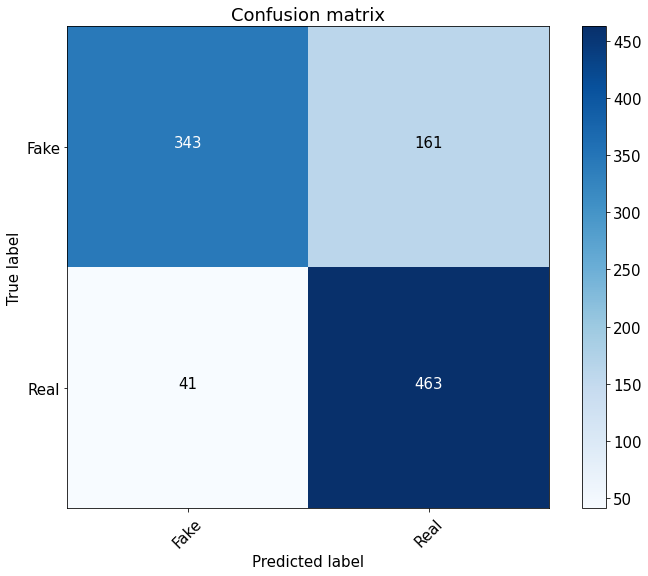

In [18]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_kn_bst = confusion_matrix(y_test_bst, loaded_model_kn.predict(X_test_bst))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_kn_bst, classes=['Fake', 'Real'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [17]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test_bst,y_pred_kn_bst))

ROC_AUC score: 0.7996031746031745


### Проверка на тестовом наборе Povetry

In [1]:
loaded_model_svm = pickle.load(open('model_svm_sum_100.sav', 'rb'))
loaded_model_lr = pickle.load(open('model_lr_sum_100.sav', 'rb'))
loaded_model_kn = pickle.load(open('model_knc_sum_100.sav', 'rb'))

NameError: name 'pickle' is not defined

In [96]:
pkl_file_test_pov = open('dataset_test_Povetry.pkl', 'rb')
data_test_pov = pickle.load(pkl_file_test_pov)
pkl_file_test_pov.close()
X_test_pov = data_test_pov["data"]
y_test_pov = data_test_pov["label"]

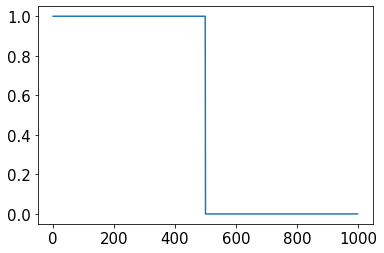

In [97]:
plt.plot(y_test_pov)

In [98]:
result_svm_pov = loaded_model_svm.score(X_test_pov, y_test_pov)
result_lr_pov = loaded_model_lr.score(X_test_pov, y_test_pov)
result_kn_pov = loaded_model_kn.score(X_test_pov, y_test_pov)

print(result_svm_pov)
print(result_lr_pov)
print(result_kn_pov)

0.774
0.715
0.793


### Метрики качества

In [99]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [100]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### SVM

In [101]:
y_pred_svm_pov = loaded_model_svm.predict(X_test_pov)

score = metrics.precision_score(y_test_pov,y_pred_svm_pov, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test_pov,y_pred_svm_pov, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test_pov,y_pred_svm_pov, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.7743555648119964
Recall score: 0.774
F1 score: 0.7739267522677347


Confusion matrix, without normalization
[[396 104]
 [122 378]]


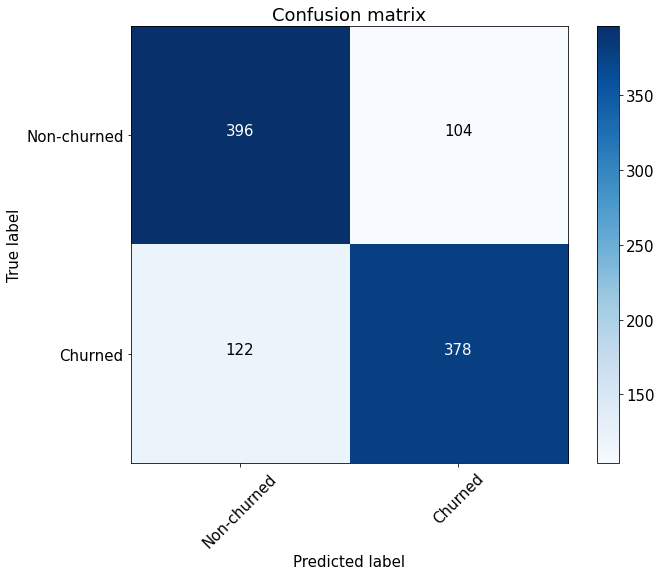

In [102]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_svm_pov = confusion_matrix(y_test_pov, loaded_model_svm.predict(X_test_pov))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_svm_pov, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [103]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test_pov,y_pred_svm_pov))

ROC_AUC score: 0.774


### Logistic regression

In [104]:
y_pred_lr_pov = loaded_model_lr.predict(X_test_pov)

score = metrics.precision_score(y_test_pov,y_pred_lr_pov, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test_pov,y_pred_lr_pov, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test_pov,y_pred_lr_pov, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.7155388471177946
Recall score: 0.715
F1 score: 0.7148217636022514


Confusion matrix, without normalization
[[370 130]
 [155 345]]


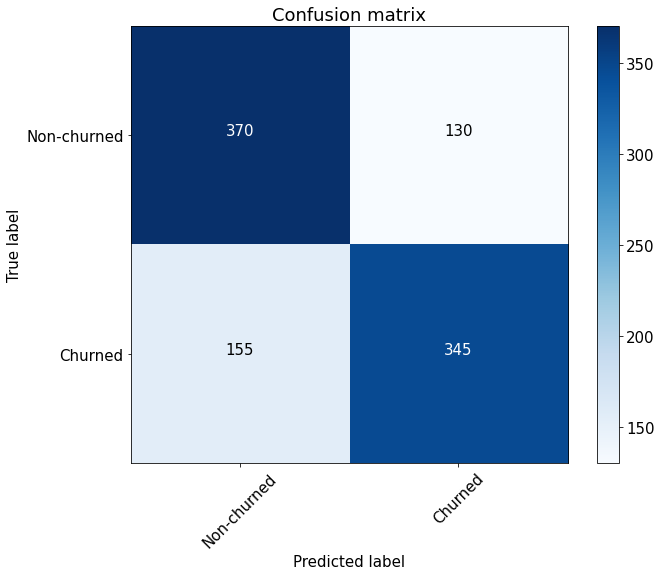

In [105]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_lr_pov = confusion_matrix(y_test_pov, loaded_model_lr.predict(X_test_pov))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_lr_pov, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [106]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test_pov,y_pred_lr_pov))

ROC_AUC score: 0.715


### K Neighbors

In [107]:
y_pred_kn_pov = loaded_model_kn.predict(X_test_pov)

score = metrics.precision_score(y_test_pov,y_pred_kn_pov, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test_pov,y_pred_kn_pov, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(y_test_pov,y_pred_kn_pov, average= "weighted")
print("F1 score: {}".format(score_lr1))

Precision score: 0.7930293029302931
Recall score: 0.793
F1 score: 0.7929948248706219


Confusion matrix, without normalization
[[394 106]
 [101 399]]


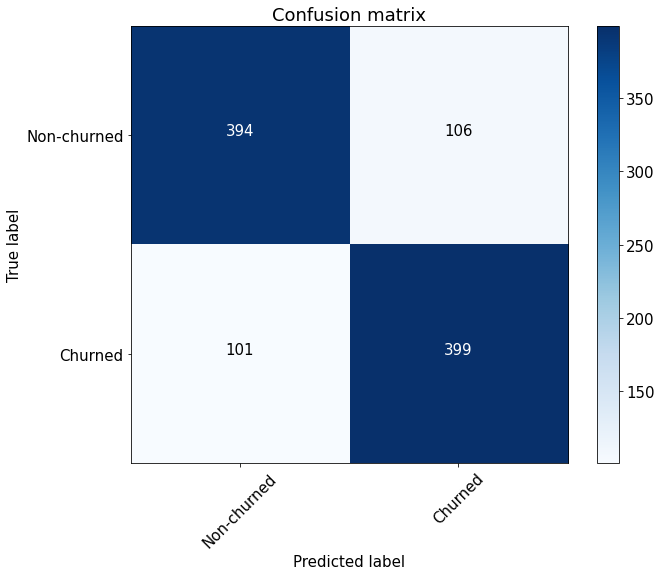

In [109]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix_kn_pov = confusion_matrix(y_test_pov, loaded_model_kn.predict(X_test_pov))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix_kn_pov, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [110]:
from sklearn.metrics import roc_auc_score
print('ROC_AUC score:',roc_auc_score(y_test_pov,y_pred_kn_pov))

ROC_AUC score: 0.793


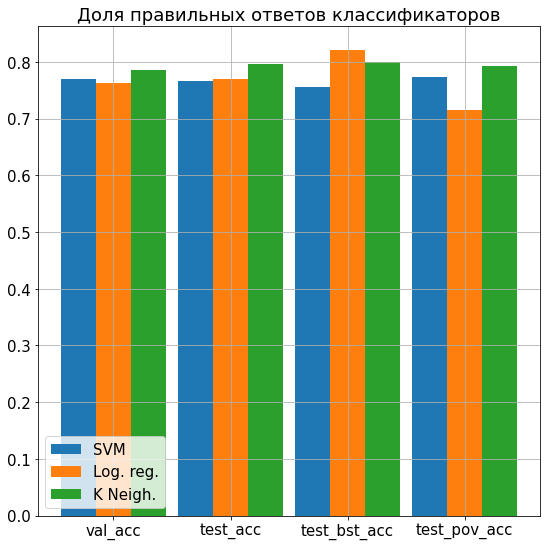

In [113]:
groups = ['val_acc', 'test_acc', 'test_bst_acc', 'test_pov_acc']
g1 = [svclassifier.score(X_valid, y_valid), svclassifier.score(X_test, y_test), 
      svclassifier.score(X_test_bst, y_test_bst), svclassifier.score(X_test_pov, y_test_pov)] 
g2 = [logreg.score(X_valid, y_valid), logreg.score(X_test, y_test),
      logreg.score(X_test_bst, y_test_bst), logreg.score(X_test_pov, y_test_pov)]
g3 = [knc.score(X_valid, y_valid), knc.score(X_test, y_test),
      knc.score(X_test_bst, y_test_bst), knc.score(X_test_pov, y_test_pov)]
width = 0.3
x = np.arange(len(groups))
fig, ax = plt.subplots(figsize = (9, 9))
rects1 = ax.bar(x - width, g1, width, label='SVM')
rects2 = ax.bar(x, g2, width, label='Log. reg.')
rects3 = ax.bar(x + width, g3, width, label='K Neigh.')
ax.set_title('Доля правильных ответов классификаторов')
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.legend(loc = 3)
ax.grid(True)